In [5]:
import sys
sys.path.append('./src/')
# import feature_utils
import numpy as np
import imp
import pandas as pd
import os
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay  # flat_classification_report


In [15]:
def get_prediction_report(y_test, y_pred, labels, title=""):
    # ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap='gray_r')
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    print(classification_report(y_test, y_pred, labels=labels))
    disp.plot(cmap='gray_r')

In [7]:
path={}
path["all_pred"]='/dataframes/duplicate/fixed_pred_sm.ssa.per.client.csv'

In [8]:
p=os.path.join(os.getcwd(),path["all_pred"])
p
all_pred=pd.read_csv(os.getcwd()+path["all_pred"])

In [9]:
col_list=['bert_true','bert_proba_0','bert_proba_0','crf_proba_0','crf_proba_1']

In [10]:
# all_pred.iloc[:30,2:15]

In [11]:
y_true=np.zeros(100)
y_true[0:26]=1
y_true

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
y_pred=np.ones(100)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.26      1.00      0.41        26

    accuracy                           0.26       100
   macro avg       0.13      0.50      0.21       100
weighted avg       0.07      0.26      0.11       100



/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

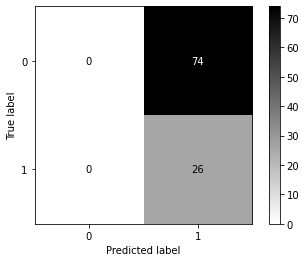

In [16]:
get_prediction_report(y_test=y_true,y_pred=y_pred,labels=[0,1])

In [17]:
y_pred=np.zeros(100)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        74
           1       0.00      0.00      0.00        26

    accuracy                           0.74       100
   macro avg       0.37      0.50      0.43       100
weighted avg       0.55      0.74      0.63       100



/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

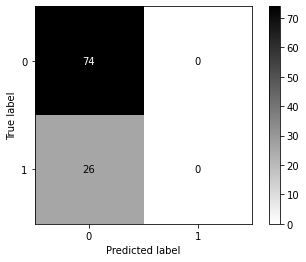

In [18]:
get_prediction_report(y_test=y_true,y_pred=y_pred,labels=[0,1])

### Calculate boolean bor true/false baseline

In [23]:
import common_utils
dir_name='duplicate'

base_pred=common_utils.load_db(dir_name,'tf.base.pred.char')


Opened /scratch/sim_reg9/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/tf.base.pred.char.csv,  index False


In [25]:
base_pred['base_predicted']=1
base_pred

,base_predicted,base_group,base_split,base_true
0,1,19,0,0
1,1,19,0,0
2,1,19,0,0
3,1,19,0,0
4,1,19,0,0
...,...,...,...,...
38429,1,16,7,0
38430,1,16,7,0
38431,1,16,7,0
38432,1,16,7,0


In [27]:
k='base'
base_pred = base_pred.assign(
            sent_idx=base_pred.groupby(['{}_group'.format(k)]).cumcount())
base_pred

,base_predicted,base_group,base_split,base_true,sent_idx
0,1,19,0,0,0
1,1,19,0,0,1
2,1,19,0,0,2
3,1,19,0,0,3
4,1,19,0,0,4
...,...,...,...,...,...
38429,1,16,7,0,418
38430,1,16,7,0,419
38431,1,16,7,0,420
38432,1,16,7,0,421


In [28]:
import classes
bool_rec=classes.MyBooleanRecall(dir_name,base_pred,'base')


init >> MyBooleanRecall base


In [30]:
bool_rec.stat

{'total_true_narrative': 648,
 'tp': 648,
 'fn': 0,
 'total_pred_narrative': 79,
 'fp': -569,
 'recall': 1.0,
 'precision': 8.20253164556962,
 'f1': 1.7826685006877578}

In [31]:
bool_pred_true=np.ones(1375)
bool_true=np.zeros(1375)
bool_true[:648]=1
bool_pred_false=np.zeros(1375)

In [37]:
sum(bool_pred_false)

0.0

In [38]:
sum(bool_pred_true)

1375.0

In [32]:
bool_true

array([1., 1., 1., ..., 0., 0., 0.])

In [33]:
sum(bool_true)

648.0

/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       727
           1       0.47      1.00      0.64       648

    accuracy                           0.47      1375
   macro avg       0.24      0.50      0.32      1375
weighted avg       0.22      0.47      0.30      1375



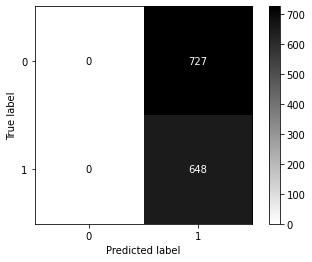

In [43]:
get_prediction_report(y_test=bool_true,y_pred=bool_pred_true,labels=[0,1])

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       727
           1       0.00      0.00      0.00       648

    accuracy                           0.53      1375
   macro avg       0.26      0.50      0.35      1375
weighted avg       0.28      0.53      0.37      1375



/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

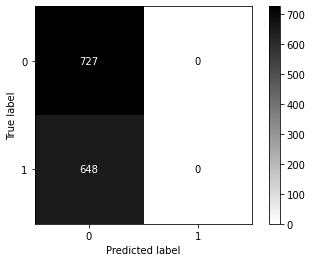

In [44]:
get_prediction_report(y_test=bool_true,y_pred=bool_pred_false,labels=[0,1])

In [45]:
## Compare agreement

In [49]:
dana=pd.read_csv(os.getcwd()+'/dataframes/agreement/02_sent_db.csv')

In [50]:
dana

,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_pos_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc
0,0.0,היי,0.0,0.0,0.0,2.0,0.0,0.0,0.006098,client,not_nar,0.0,3.0,1,0,1.000,0.001355
1,0.0,היי,0.0,1.0,0.0,2.0,1.0,1.0,0.012195,therapist,not_nar,0.0,3.0,0,0,1.000,0.002710
2,1.0,להכנס או להשאר בחוץ ותקראי לי,0.0,2.0,0.0,2.0,2.0,2.0,0.018293,client,not_nar,0.0,31.0,1,0,0.500,0.004065
3,0.0,כאילו,1.0,2.0,0.0,2.0,2.0,2.0,0.018293,client,not_nar,0.0,5.0,1,1,1.000,0.005420
4,0.0,אה,0.0,3.0,0.0,2.0,3.0,3.0,0.024390,therapist,not_nar,0.0,2.0,0,0,1.000,0.006775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,0.0,מה מה עכשיו הבחירות כשהאנרגיה חזרה,3.0,199.0,0.0,2.0,163.0,163.0,1.000000,therapist,not_nar,0.0,34.0,0,3,0.500,0.994580
734,0.0,מה עכשיו אתה עושה עם הדברים ו כל השאלות האלה ש...,4.0,199.0,0.0,2.0,163.0,163.0,1.000000,therapist,not_nar,0.0,106.0,0,4,0.625,0.995935
735,0.0,כשאני שומעת שהמשאלה היא לעשות משהו אחר,5.0,199.0,0.0,2.0,163.0,163.0,1.000000,therapist,not_nar,0.0,38.0,0,5,0.750,0.997290
736,0.0,כאילו ללכת יותר אתה קורא לזה עם ההנאה,6.0,199.0,0.0,2.0,163.0,163.0,1.000000,therapist,not_nar,0.0,37.0,0,6,0.875,0.998645


In [51]:
mor=pd.read_csv(os.getcwd()+'/dataframes/agreement/01_sent_db.csv')

In [53]:
sum(dana['is_nar']==mor['is_nar'])/mor.shape[0]

0.9132791327913279